<a href="https://colab.research.google.com/github/Sudiptaz1/Data/blob/main/Using_FiPy_for_Simplified_2D_Simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install fipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.1/446.1 kB 5.5 MB/s eta 0:00:00


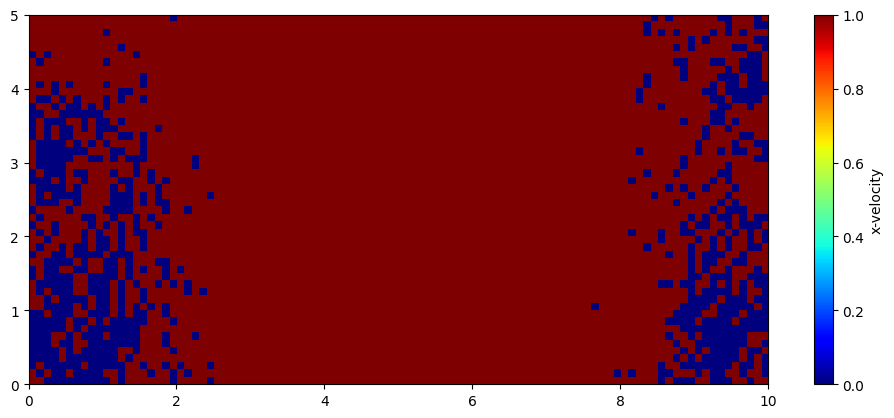

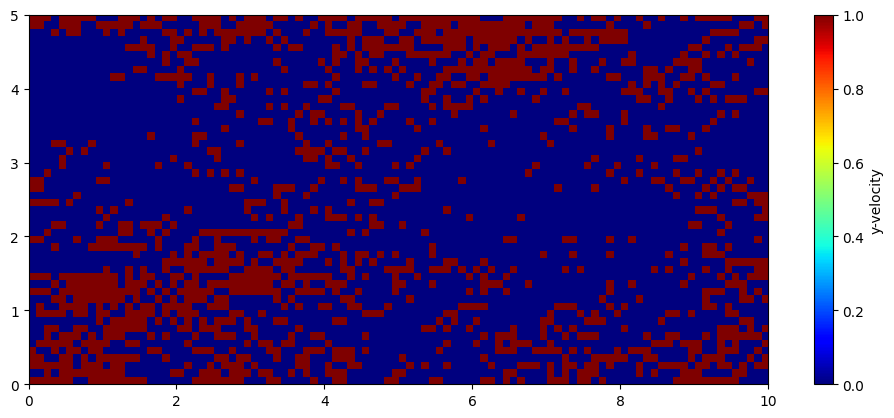

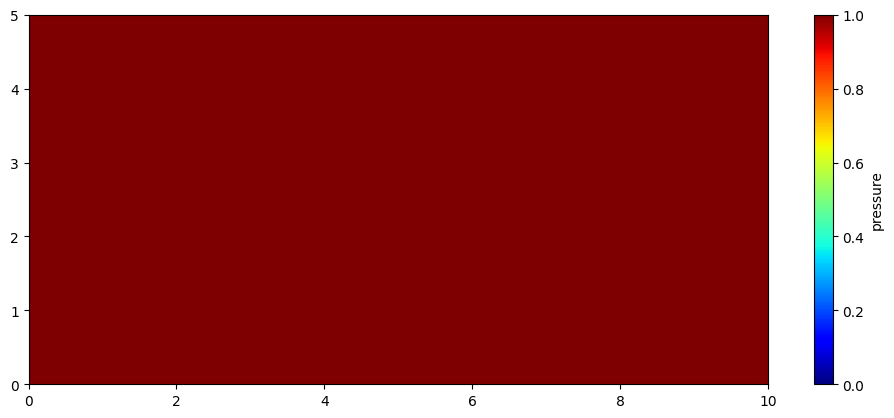

In [3]:
from fipy import *
import numpy as np

# Step 1: Define the domain and mesh
Lx, Ly = 10.0, 5.0  # Domain size
nx, ny = 100, 50    # Number of cells
mesh = Grid2D(dx=Lx/nx, dy=Ly/ny, nx=nx, ny=ny)

# Step 2: Define variables
pressure = CellVariable(name="pressure", mesh=mesh, value=0.0)
velocity_x = CellVariable(name="x-velocity", mesh=mesh, value=0.0)
velocity_y = CellVariable(name="y-velocity", mesh=mesh, value=0.0)

# Step 3: Define boundary conditions
velocity_x.constrain(1.0, where=mesh.facesLeft)  # Inlet velocity
velocity_x.constrain(0.0, where=mesh.facesRight)  # Outlet velocity
velocity_y.constrain(0.0, where=mesh.exteriorFaces)  # No-slip walls

# Step 4: Solve the Navier-Stokes equations
viscosity = 0.01  # Kinematic viscosity
momentum_x = TransientTerm(var=velocity_x) == DiffusionTerm(coeff=viscosity, var=velocity_x)
momentum_y = TransientTerm(var=velocity_y) == DiffusionTerm(coeff=viscosity, var=velocity_y)

# Pressure correction equation
pressure_equation = DiffusionTerm(coeff=1.0, var=pressure) == -ImplicitSourceTerm(coeff=1.0, var=velocity_x)

# Step 5: Time-stepping loop
time_step = 0.01
steps = 100
for step in range(steps):
    momentum_x.solve(dt=time_step)
    momentum_y.solve(dt=time_step)
    pressure_equation.solve()

    # Update velocities based on pressure correction
    velocity_x.setValue(velocity_x - pressure.grad[0])
    velocity_y.setValue(velocity_y - pressure.grad[1])

# Step 6: Visualize results
viewer = Viewer(vars=(velocity_x, velocity_y, pressure), datamin=0, datamax=1)
viewer.plot()

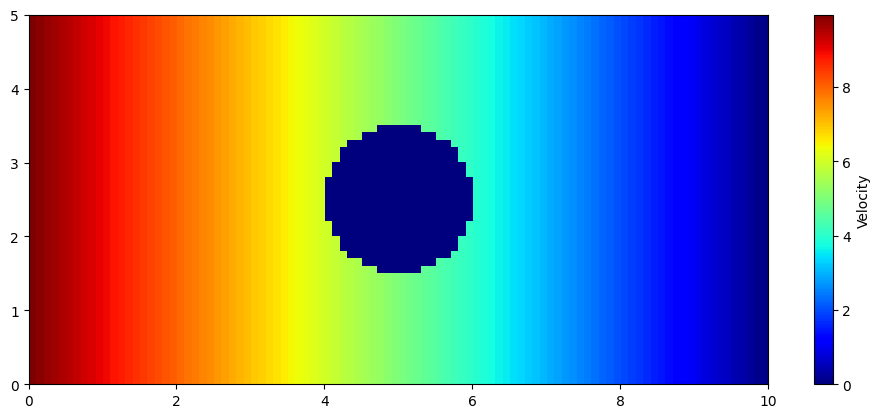

In [4]:
from fipy import CellVariable, Grid2D, DiffusionTerm, Viewer
from fipy.tools import numerix

# Step 1: Define the grid
nx = 100
ny = 50
dx = 0.1
dy = 0.1
mesh = Grid2D(dx=dx, dy=dy, nx=nx, ny=ny)

# Step 2: Define the velocity field
velocity = CellVariable(name="Velocity", mesh=mesh, value=0.0)

# Step 3: Define the airfoil as a mask
x, y = mesh.cellCenters
airfoil_mask = ((x - 5)**2 + (y - 2.5)**2) < 1.0  # Circular airfoil for simplicity

# Step 4: Define boundary conditions
velocity.constrain(10.0, mesh.facesLeft)  # Inlet velocity
velocity.constrain(0.0, mesh.facesRight)  # Outlet pressure
velocity.constrain(0.0, airfoil_mask)     # No-slip on airfoil

# Step 5: Solve the flow (simplified diffusion equation for demonstration)
eq = DiffusionTerm(coeff=1.0) == 0
eq.solve(var=velocity)

# Step 6: Visualize the results
viewer = Viewer(vars=velocity)
viewer.plot()